In [186]:
import pandas as pd

url = 'marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)

In [187]:
numericals_df = df.select_dtypes(include='number')

In [188]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [189]:
# Drop NAN and duplicates
numericals_df = numericals_df.dropna()
numericals_df = numericals_df.drop_duplicates()

### X-y Splitt

In [190]:
numericals_df.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'month'],
      dtype='object')

In [191]:
X = numericals_df[['customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'month']]
y = numericals_df[['total_claim_amount']]

### Train test split

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

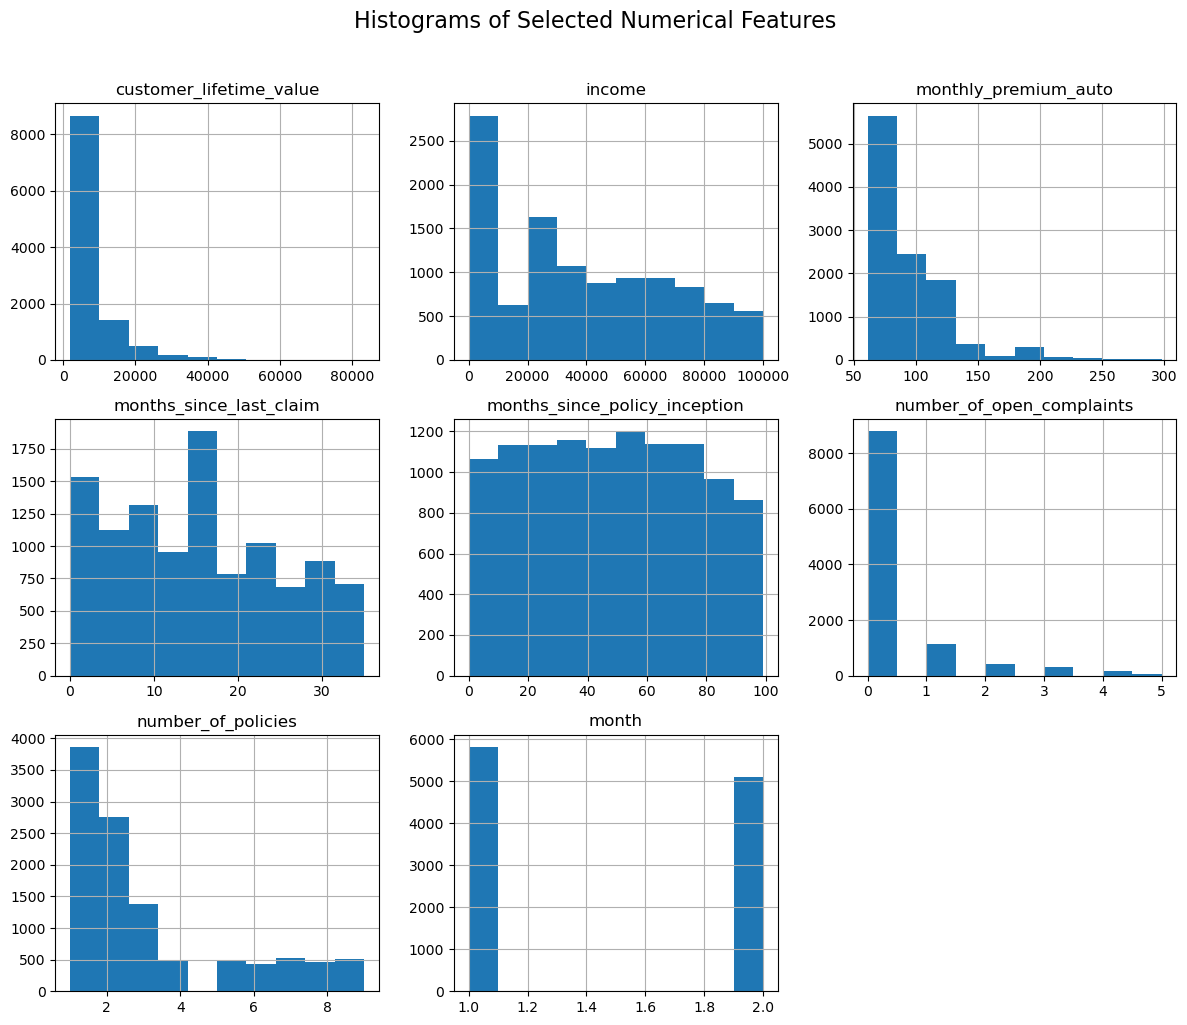

In [193]:
# Look at the histograms of the individual columns to decide which column should be transformed.

import matplotlib.pyplot as plt
import math

# Assuming 'numericals_df' is your DataFrame with numerical features
# Replace it with your actual DataFrame

selected_columns = X.columns

# Calculate the required layout size
n_cols = len(selected_columns)
cols_per_row = 3
n_rows = math.ceil(n_cols / cols_per_row)

# Display histograms for specific numerical columns
X[selected_columns].hist(bins=10, figsize=(12, 10), layout=(n_rows, cols_per_row), sharex=False)
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [194]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

<Axes: >

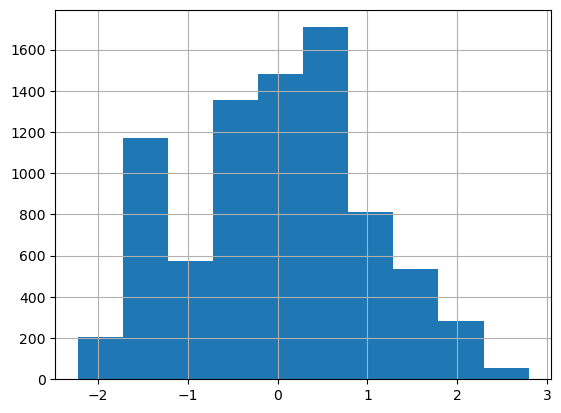

In [195]:
#PowerTransform X_train
pt1 = PowerTransformer()
X_train['customer_lifetime_value_pt'] = pt1.fit_transform(X_train[['customer_lifetime_value']])
X_train['customer_lifetime_value_pt'].hist()

<Axes: >

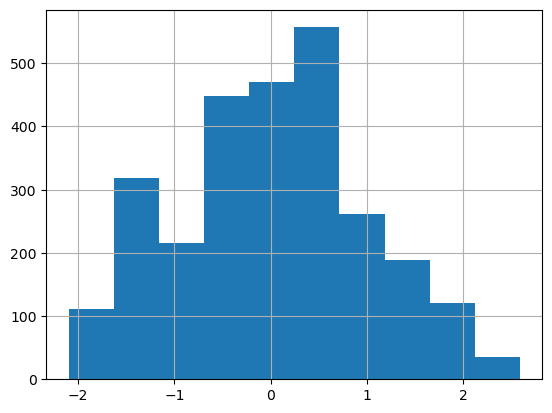

In [196]:
#PowerTransform X_test
X_test['customer_lifetime_value_pt'] = pt1.transform(X_test[['customer_lifetime_value']])
X_test['customer_lifetime_value_pt'].hist()

<Axes: >

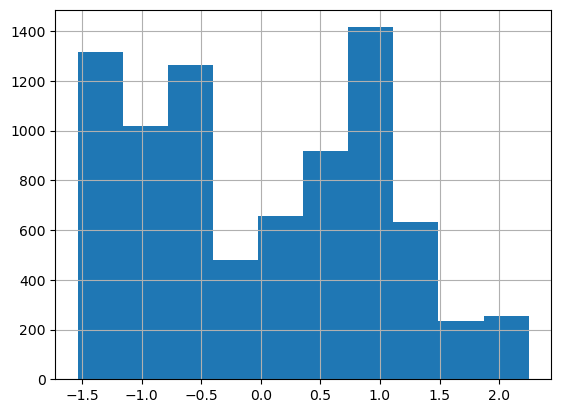

In [197]:
#PowerTransform X_train
pt2 = PowerTransformer()
X_train['monthly_premium_auto_pt'] = pt2.fit_transform(X_train[['monthly_premium_auto']])
X_train['monthly_premium_auto_pt'].hist()

<Axes: >

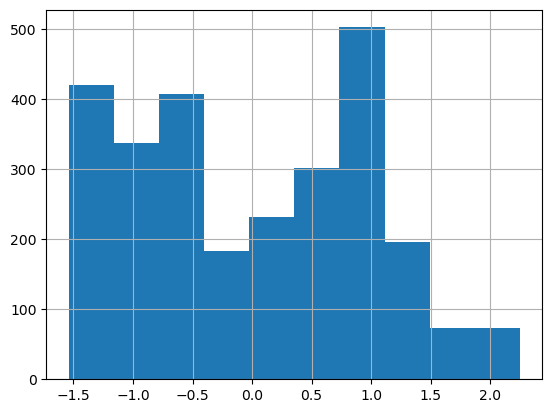

In [198]:
#PowerTransform X_test
X_test['monthly_premium_auto_pt'] = pt2.transform(X_test[['monthly_premium_auto']])
X_test['monthly_premium_auto_pt'].hist()

<Axes: >

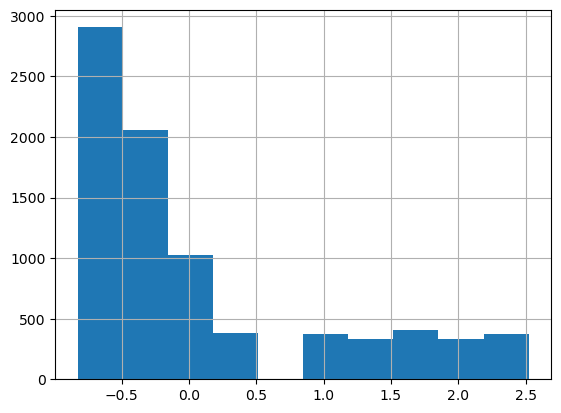

In [199]:
# StandardScaler X_train
scaler = StandardScaler()
standardScaled_number_of_policies = scaler.fit_transform(X_train[['number_of_policies']])
X_train['number_of_policies'] = standardScaled_number_of_policies
X_train['number_of_policies'].hist()

<Axes: >

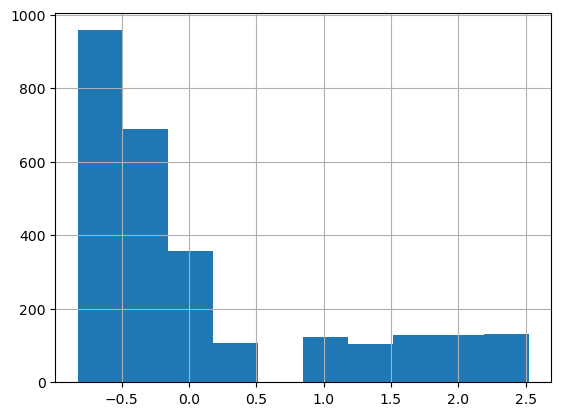

In [200]:
# StandardScaler X_test
standardScaled_number_of_policies = scaler.transform(X_test[['number_of_policies']])
X_test['number_of_policies'] = standardScaled_number_of_policies
X_test['number_of_policies'].hist()

<Axes: >

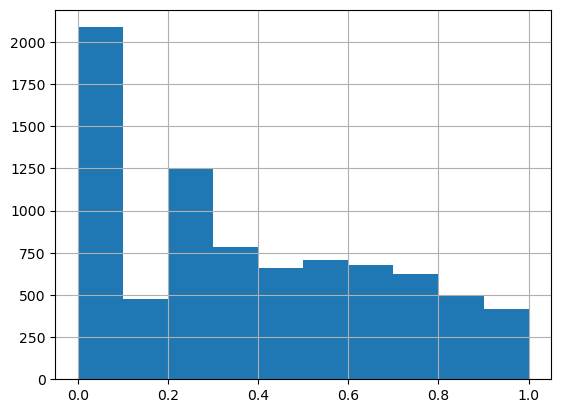

In [201]:
# MinMaxScaler X_train
scaler = MinMaxScaler()
income_MM = scaler.fit_transform(X_train[['income']])
X_train['income_MM'] = income_MM
X_train['income_MM'].hist()

<Axes: >

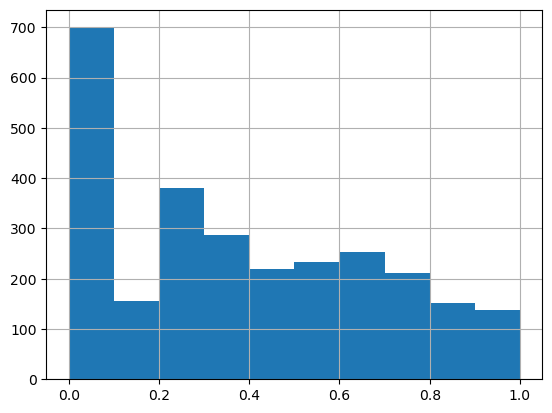

In [202]:
# MinMaxScaler X_test
income_MM = scaler.transform(X_test[['income']])
X_test['income_MM'] = income_MM
X_test['income_MM'].hist()

### Apply linear regression

In [203]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [204]:
model.coef_

array([[-4.04208039e-04, -3.28773423e-03,  6.10454594e+00,
         1.61202270e-01, -1.81598762e-01, -6.43183091e-01,
         1.21709828e+00, -1.71924555e+00, -1.69389313e+00,
        -2.78554733e+01, -3.28836083e-08]])

In [205]:
model.intercept_

array([0.41263501])

### Predict mass of random total_claim_amount

In [206]:
random_total_claim_amount = X_test.sample()

In [207]:
random_total_claim_amount

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,customer_lifetime_value_pt,monthly_premium_auto_pt,income_MM
6861,9333.333631,89513,116,5.0,12,0.0,1.267033,1,0.691081,1.027036,0.8953


In [208]:
model.predict(random_total_claim_amount)

array([[379.14289652]])

### Create predictions for the test set

In [209]:
y_pred = model.predict(X_test)

In [210]:
y_pred = pd.DataFrame(y_pred)

In [211]:
y_test = y_test.reset_index(drop=True)

In [212]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [213]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [214]:
residuals_df

,total_claim_amount,0
0,475.423848,125.222070
1,350.400000,352.630010
2,482.400000,425.570109
3,673.342650,421.270392
4,302.400000,171.861354
...,...,...
2723,460.266881,580.450217
2724,405.883346,311.251151
2725,41.182611,195.711946
2726,364.800000,452.095753


In [215]:
residuals_df = residuals_df.rename(columns={'total_claim_amount': 'y_test',0: 'y_pred'})

In [216]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [217]:
residuals_df

,y_test,y_pred,residual
0,475.423848,125.222070,350.201778
1,350.400000,352.630010,-2.230010
2,482.400000,425.570109,56.829891
3,673.342650,421.270392,252.072258
4,302.400000,171.861354,130.538646
...,...,...,...
2723,460.266881,580.450217,-120.183336
2724,405.883346,311.251151,94.632195
2725,41.182611,195.711946,-154.529335
2726,364.800000,452.095753,-87.295753


### Calculating metrics

In [218]:
mean_error = residuals_df['residual'].mean()
mean_error

5.1252715080798135

In [219]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
mse(y_test, y_pred)

40584.70239828326

In [220]:
import numpy as np
np.sqrt(mse(y_test, y_pred))

201.4564528583864

In [221]:
rmse = mse(y_test, y_pred, squared=False)
rmse

201.4564528583864

### Computing R2_score for test_set

In [226]:
from sklearn.metrics import r2_score
r2_test = round(r2_score(y_test, y_pred), 2)
r2_test

0.51

### Computing R2_score for train_set

In [239]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.52